In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import keras
import sklearn
import tensorflow as tf
import os

Using TensorFlow backend.


In [2]:
train_data='train'
test_data='test_set'

In [3]:
category=['dogs','cats']

train\dogs
train\cats


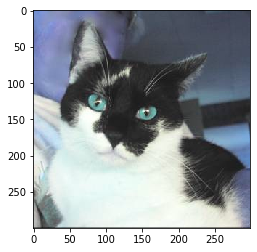

In [5]:
count=1
for categorys in category:
        path=os.path.join(train_data,categorys)
        print(path)
        for img in os.listdir(path):
            image=cv2.imread(os.path.join(path,img),cv2.COLOR_BGR2GRAY)
            plt.imshow(image)
            count=count+1
            
           
    

In [6]:
print(count)
print(image.shape)

8001
(300, 299, 3)


In [7]:
H=int(image.shape[0]*40/100)
W=int(image.shape[1]*40/100)
dim=[H,W]
resize=cv2.resize(image,(H,W),interpolation =cv2.INTER_AREA)

In [8]:
print(resize.shape)

(119, 120, 3)


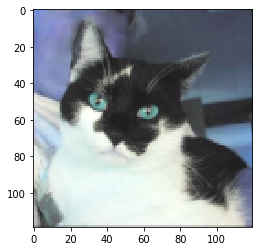

In [9]:
plt.imshow(resize)

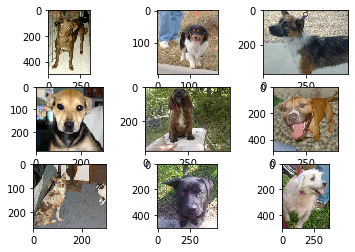

In [10]:
from matplotlib import pyplot
from matplotlib.image import imread
# define location of dataset
folder = 'train/dogs/'
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# define filename
	filename = folder + 'dog.' + str(i+1) + '.jpg'
	# load image pixels
	image = imread(filename)
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

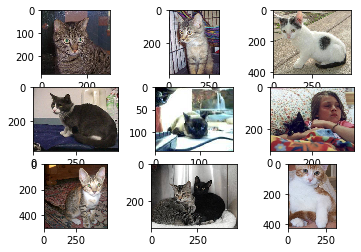

In [11]:
from matplotlib import pyplot
from matplotlib.image import imread
# define location of dataset
folder = 'train/cats/'
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# define filename
	filename = folder + 'cat.' + str(i+1) + '.jpg'
	# load image pixels
	image = imread(filename)
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

In [12]:
from os import listdir
from numpy import asarray
from numpy import save
from keras.preprocessing.image import load_img
from keras.preprocessing .image import img_to_array

In [13]:
photos=[]
labels=[]
path="test_set/"
print(path)

test_set/


In [14]:
#training dataset 1. labeling it 2. resizing it 
training_data=[]
def create_training_data():
    for categorys in category:
        output=0.0
        if categorys.startswith('cat'):
            output=1.0
        path=os.path.join(train_data,categorys)
        for img in os.listdir(path):
            try:
                image=cv2.imread(os.path.join(path,img),cv2.COLOR_BGR2GRAY)
                new_array=cv2.resize(image,(H,W),interpolation =cv2.INTER_AREA)
                training_data.append([new_array,output])
            except Exception as ex:
                print("broken data")
                pass
            
create_training_data()

In [18]:
#randmize your dataset
import random
random.shuffle(training_data)

In [19]:
for sample in training_data[:10]:
    print(sample[1])

0.0
0.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
1.0


In [20]:
x=[]#feature
y=[]#label
for feature,label in training_data:
    x.append(feature)
    y.append(label)
 #feature has to be in numpy array 
# label could stay as it is but better to convert it too
x=np.array(x).reshape(-1,H,W,1)
x.shape

(24000, 120, 119, 1)

In [21]:
#saving your data
from numpy import save
save('dogs_vs_cats_photos.npy', x)
save('dogs_vs_cats_labels.npy', y)

In [22]:
#load and fetch your data
from numpy import load
photo=load('dogs_vs_cats_photos.npy')
label=load('dogs_vs_cats_labels.npy')

In [23]:
print(photo.shape)

(24000, 120, 119, 1)


In [24]:
import os
subdir=['train/','test_set/']
for subdirs in subdir:
    labeldirs=['cats','dogs']
    for labdir in labeldirs:
        newdir=subdirs+labdir
        print(newdir)
        os.makedirs(newdir,exist_ok=True)

train/cats
train/dogs
test_set/cats
test_set/dogs


In [28]:
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

In [29]:
# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dropout(0.5))
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
	return model
    

In [30]:
# plot diagnostic learning curves
def summarize_diagnostics(history):
	# plot loss
	pyplot.subplot(211)
	pyplot.title('Cross Entropy Loss')
	pyplot.plot(history.history['loss'], color='blue', label='train')
	pyplot.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	pyplot.subplot(212)
	pyplot.title('Classification Accuracy')
	pyplot.plot(history.history['accuracy'], color='blue', label='train')
	pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
	# save plot to file
	filename = sys.argv[0].split('/')[-1]
	pyplot.savefig(filename + '_plot.png')
	pyplot.close()
 
# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(rescale=1.0/255.0)
	# prepare iterators
	train_it = datagen.flow_from_directory('train/',
		class_mode='binary', batch_size=64, target_size=(200, 200))
	test_it = datagen.flow_from_directory('test_set/',
		class_mode='binary', batch_size=64, target_size=(200, 200))
	# fit model
	history = model.fit_generator(train_it, steps_per_epoch=len(train_it),
		validation_data=test_it, validation_steps=len(test_it), epochs=5, verbose=0)
	# evaluate model
	_, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)
	print('> %.3f' % (acc * 100.0))
	# learning curves
	summarize_diagnostics(history)
 
# entry point, run the test harness
run_test_harness()

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
> 58.900
